In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(80013493)
tf.set_random_seed(80013493)

In [0]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
#히든레이어를 하나 둠으로써 nn구성
#노드개수를 1024개로 설정
#input layer
num_units = 1024
x = tf.placeholder(tf.float32, [None, 784])
w = tf.get_variable("w1", shape=[784, num_units],initializer=tf.keras.initializers.he_normal(seed=None))
b1 = tf.Variable(tf.zeros([num_units]))
L1 = tf.nn.relu(tf.matmul(x, w1) + b1)

#hidden layer
w2 = tf.get_variable("w0", shape=[num_units, 10],initializer=tf.keras.initializers.he_normal(seed=None))
b2 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(L1, w2) + b2)

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=p, labels=t))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.InteractiveSession()#session과 다른점은 자기자신에 대한 세션도 생성한다는 것 => 매번 세션을 만들지 않아도 됨
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(2000):
  i += 1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(optimizer, feed_dict = {x:batch_xs, t:batch_ts})
  if i%100 == 0:
    loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val, acc_val))


Step: 100, Loss: 2664.980713, Accuracy: 0.924500
Step: 200, Loss: 1871.782104, Accuracy: 0.945000
Step: 300, Loss: 1564.150635, Accuracy: 0.956500
Step: 400, Loss: 1466.160034, Accuracy: 0.956100
Step: 500, Loss: 1150.718018, Accuracy: 0.965000
Step: 600, Loss: 1148.197021, Accuracy: 0.966500
Step: 700, Loss: 991.955750, Accuracy: 0.970000
Step: 800, Loss: 945.642334, Accuracy: 0.972100
Step: 900, Loss: 896.474670, Accuracy: 0.973300
Step: 1000, Loss: 831.530518, Accuracy: 0.975000
Step: 1100, Loss: 814.963989, Accuracy: 0.976100
Step: 1200, Loss: 745.806213, Accuracy: 0.976500
Step: 1300, Loss: 828.347900, Accuracy: 0.975600
Step: 1400, Loss: 746.691406, Accuracy: 0.977200
Step: 1500, Loss: 712.837891, Accuracy: 0.976700
Step: 1600, Loss: 795.060181, Accuracy: 0.975200
Step: 1700, Loss: 726.782532, Accuracy: 0.977800
Step: 1800, Loss: 717.988586, Accuracy: 0.976900
Step: 1900, Loss: 646.003723, Accuracy: 0.980100
Step: 2000, Loss: 622.334229, Accuracy: 0.980800


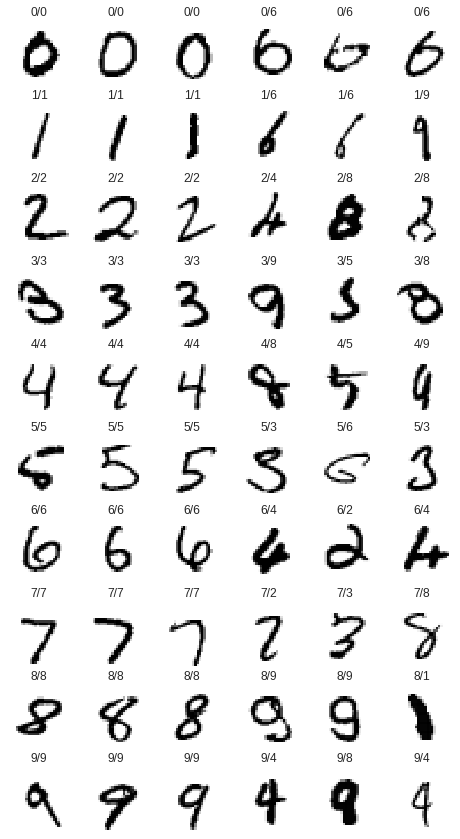

In [0]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
#맞는 것과 틀린 것 세개씩 출력
fig = plt.figure(figsize = (8,15))
for i in range(10):
  c = 1
  for(image, label, pred) in zip(images, labels, p_val):
    prediction, actual = np.argmax(pred), np.argmax(label)#actual : 실제값
    if prediction != i:
      continue
    if (c < 4 and i == actual) or (c >= 4 and i!= actual):
      subplot = fig.add_subplot(10, 6, i*6 +c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.set_title('%d/%d'%(prediction, actual))
      subplot.imshow(image.reshape((28,28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
      c += 1
      if c>6:
        break